/var/folders/68/mhmqcpdn52943pyql2n4wj440000gn/T/ipykernel_3498/3186325540.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Completions['passer'] = pas
/var/folders/68/mhmqcpdn52943pyql2n4wj440000gn/T/ipykernel_3498/3186325540.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Completions['recipient'] = rec
/var/folders/68/mhmqcpdn52943pyql2n4wj440000gn/T/ipykernel_3498/3186325540.py:167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.


<function matplotlib.pyplot.show(close=None, block=None)>

findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.


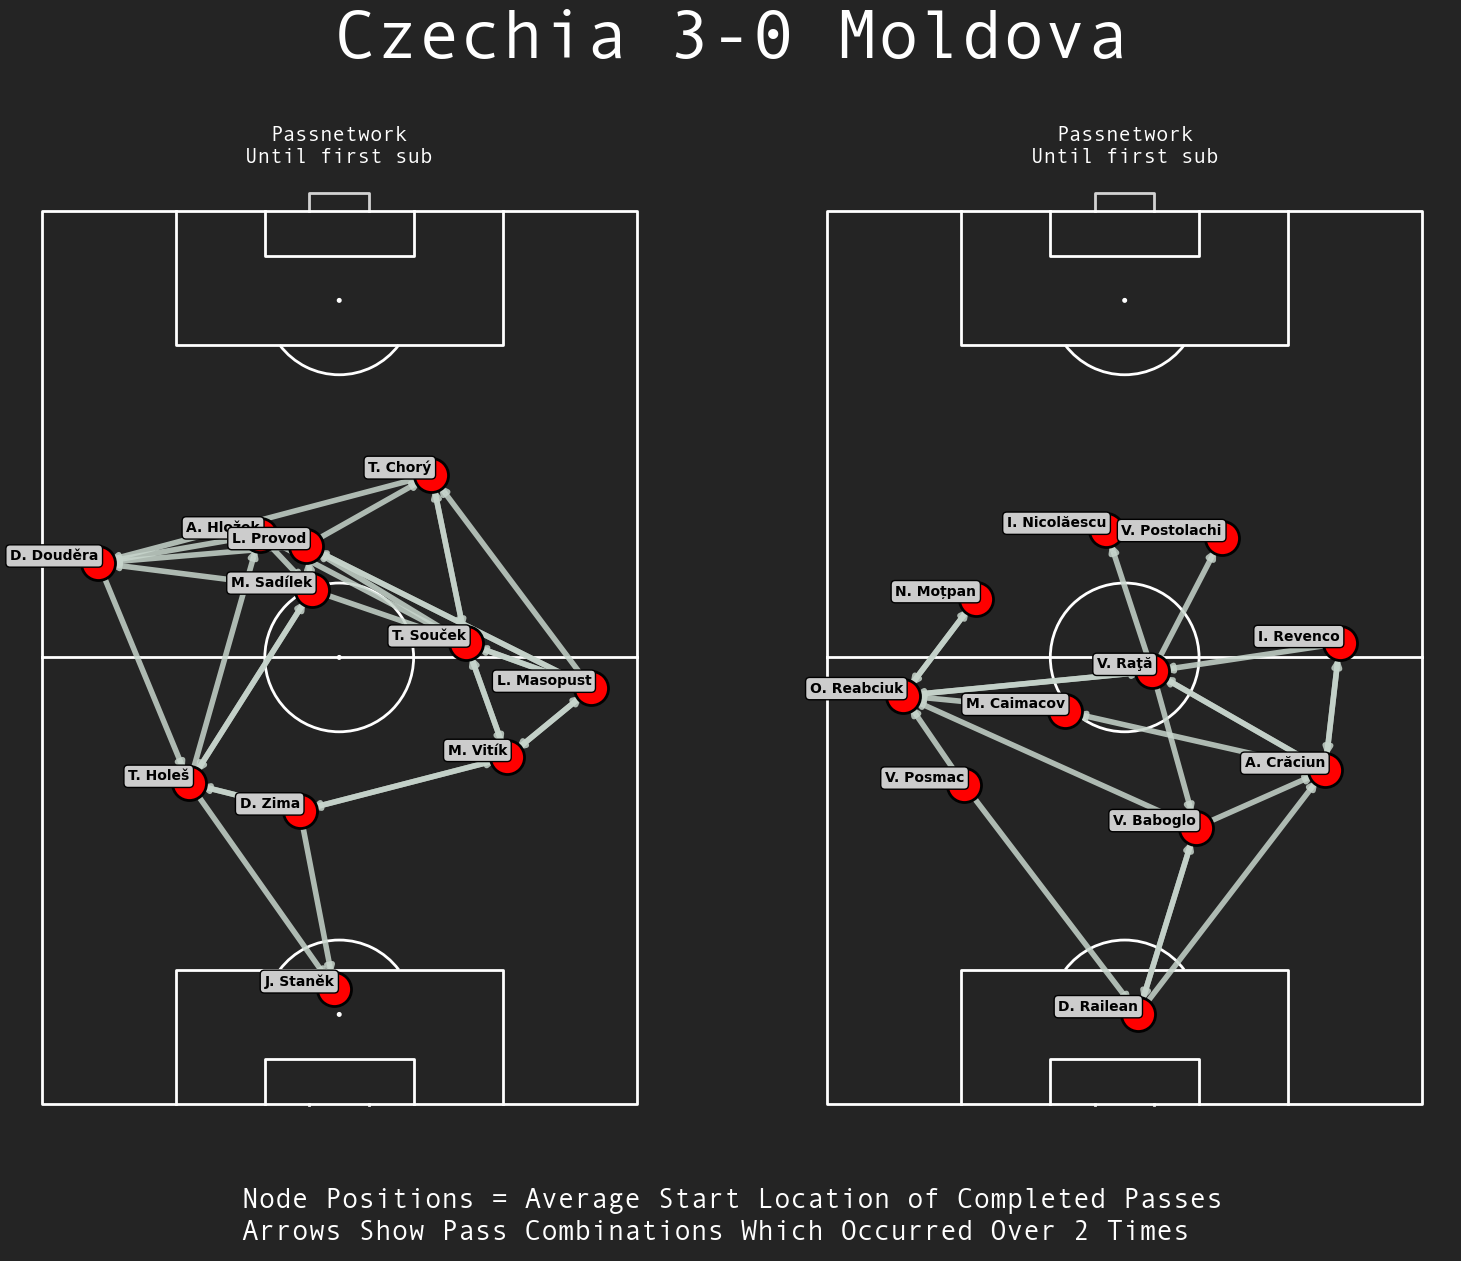

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from highlight_text import fig_text
import matplotlib as mpl
from mplsoccer.pitch import VerticalPitch
from matplotlib import patches
import matplotlib.patheffects as path_effects
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
from scipy.ndimage import gaussian_filter
from mplsoccer import Pitch, VerticalPitch, FontManager
import math
from matplotlib.colors import to_rgba
from scipy.spatial import ConvexHull



# load the data
df = pd.read_csv("/Users/marclambertes/Python/Matches/Men/UEFA Q/Czechia 3-0 Moldova.csv")

fig, axs = plt.subplots(1, 2, figsize=(18, 12))
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)


fig.set_facecolor('#242424')

        
ax = axs[0]
OneTeam = df.loc[(df['contestantId']=='70tnqyqn871jwlk26gtjw7knm')].reset_index()

OneTeam["newsecond"] = 60*OneTeam["timeMin"]+OneTeam["timeSec"]
    
OneTeam.sort_values(by=['newsecond'])

#identify the passer and then the recipient, who'll be the playerId of the next action
OneTeam['passer'] = OneTeam['playerName']

OneTeam['recipient'] = OneTeam['passer'].shift(-1)


#filter for only passes and then successful passes
Passes = OneTeam.loc[(OneTeam['typeId']==1)]

Completions = Passes.loc[(Passes['outcome']==1)]

#find time of the team's first substitution and filter the df to only passes before that
Subs = OneTeam.loc[(OneTeam['typeId']==18)]
SubTimes = Subs["newsecond"]
SubOne = SubTimes.min()

pas = Completions['passer']
rec = Completions['recipient']

Completions['passer'] = pas
Completions['recipient'] = rec

SubTimes
#SubOne

Completions = Completions.loc[Completions['newsecond'] < SubOne]

average_locs_and_count = Completions.groupby('passer').agg({'x': ['mean'], 'y': ['mean','count']})
average_locs_and_count.columns = ['x', 'y', 'count']

average_locs_and_count

passes_between = Completions.groupby(['passer', 'recipient']).id.count().reset_index()
passes_between.rename({'id': 'pass_count'}, axis='columns', inplace=True)

passes_between = passes_between.merge(average_locs_and_count, left_on='passer', right_index=True)
passes_between = passes_between.merge(average_locs_and_count, left_on='recipient', right_index=True,
                                      suffixes=['', '_end'])


passes_between.dtypes

size=1000
radius = math.sqrt(size)/2.
arrow = mpl.patches.FancyArrowPatch(posA=(1.2*passes_between.x,80-.8*passes_between.y), 
                                    posB=(1.2*passes_between.x_end,80-.8*passes_between.y_end), 
                                    arrowstyle='-|>', mutation_scale=20, shrinkA=radius, shrinkB=radius)

#set minimum threshold for pass arrows to be plotted. So this will only plot combos which occured at least 5 times.
passes_between = passes_between.loc[(passes_between['pass_count']>2)]


#Make arrows less transparent if they have a higher count, totally optional of course
min_transparency = 0.3
color = np.array(to_rgba('#d3d3d3'))
color = np.tile(color, (len(passes_between), 1))
c_transparency = passes_between.pass_count / passes_between.pass_count.max()
c_transparency = (c_transparency * (1 - min_transparency)) + min_transparency
color[:, 3] = c_transparency


pitch = VerticalPitch(pitch_type='statsbomb', pad_bottom=0.5, pad_top=5, pitch_color='#242424', line_color='white',
                      half=False,
                      goal_type='box',
                      goal_alpha=0.8)
pitch.draw(ax=ax)
#fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False,)
fig.set_facecolor("#71797E")



def pass_line_template(ax, x, y, end_x, end_y, line_color):
    ax.annotate('', xy=(80-.8*end_y, 1.2*end_x), xytext=(80-.8*y, 1.2*x), zorder=1,
    arrowprops=dict(arrowstyle='-|>', linewidth=4, color='#c7d5cc', alpha=.85))
    
def pass_line_template_shrink(ax, x, y, end_x, end_y, line_color, dist_delta=1.2):
    dist = math.hypot(end_x - x, end_y - y)
    angle = math.atan2(end_y-y, end_x-x)
    upd_x = x + (dist - dist_delta) * math.cos(angle)
    upd_y = y + (dist - dist_delta) * math.sin(angle)
    pass_line_template(ax, x, y, upd_x, upd_y, line_color=line_color)
    
    
for index, row in passes_between.iterrows():
    pass_line_template_shrink(ax,row['x'],row['y'],row['x_end'],row['y_end'],'white')

#plot nodes
pass_box = pitch.scatter(1.2*average_locs_and_count.x, 80-0.8*average_locs_and_count.y, s=600,
                           color='#FF0000', edgecolors="#010101", linewidth=2, alpha=1, ax=ax, zorder=2)


#anootation/key at bottom
pitch.annotate("Node Positions = Average Start Location of Completed Passes\nArrows Show Pass Combinations Which Occured Over 2 Times", (-4, 40), color='white',
         fontsize=10, ha='center', va='center', ax=ax, fontweight='bold', fontfamily="Andale Mono",)


#Uncomment these next two lines to get each node labeled with the player id. Check to see if anything looks off, and make note of each player if you're going to add labeles later like their numbers
for index, row in average_locs_and_count.iterrows():
   pitch.annotate(row.name, xy=(1.2*row.x, 80-0.8*row.y), bbox = dict(boxstyle="round", fc="0.8"), c='black', va='bottom', ha='right', size=10, fontweight='bold', fontfamily="Century Gothic",ax=ax)

#Set the background color
fig.patch.set_facecolor('#242424')

#annotatios
ax.set_title("Passnetwork\nUntil first sub", fontsize=15, color="w", fontfamily="Andale Mono", fontweight='bold', pad=8)

ax = axs[1]
OneTeam = df.loc[(df['contestantId']=='bl6qj4us3s4dnaylqqs2lgrlt')].reset_index()

OneTeam["newsecond"] = 60*OneTeam["timeMin"]+OneTeam["timeSec"]
    
OneTeam.sort_values(by=['newsecond'])

#identify the passer and then the recipient, who'll be the playerId of the next action
OneTeam['passer'] = OneTeam['playerName']

OneTeam['recipient'] = OneTeam['passer'].shift(-1)


#filter for only passes and then successful passes
Passes = OneTeam.loc[(OneTeam['typeId']==1)]

Completions = Passes.loc[(Passes['outcome']==1)]

#find time of the team's first substitution and filter the df to only passes before that
Subs = OneTeam.loc[(OneTeam['typeId']==18)]
SubTimes = Subs["newsecond"]
SubOne = SubTimes.min()

pas = Completions['passer']
rec = Completions['recipient']

Completions['passer'] = pas
Completions['recipient'] = rec

SubTimes
#SubOne

Completions = Completions.loc[Completions['newsecond'] < SubOne]

average_locs_and_count = Completions.groupby('passer').agg({'x': ['mean'], 'y': ['mean','count']})
average_locs_and_count.columns = ['x', 'y', 'count']

average_locs_and_count

passes_between = Completions.groupby(['passer', 'recipient']).id.count().reset_index()
passes_between.rename({'id': 'pass_count'}, axis='columns', inplace=True)

passes_between = passes_between.merge(average_locs_and_count, left_on='passer', right_index=True)
passes_between = passes_between.merge(average_locs_and_count, left_on='recipient', right_index=True,
                                      suffixes=['', '_end'])


passes_between.dtypes

size=1000
radius = math.sqrt(size)/2.
arrow = mpl.patches.FancyArrowPatch(posA=(1.2*passes_between.x,80-.8*passes_between.y), 
                                    posB=(1.2*passes_between.x_end,80-.8*passes_between.y_end), 
                                    arrowstyle='-|>', mutation_scale=20, shrinkA=radius, shrinkB=radius)

#set minimum threshold for pass arrows to be plotted. So this will only plot combos which occured at least 5 times.
passes_between = passes_between.loc[(passes_between['pass_count']>2)]


#Make arrows less transparent if they have a higher count, totally optional of course
min_transparency = 0.3
color = np.array(to_rgba('#d3d3d3'))
color = np.tile(color, (len(passes_between), 1))
c_transparency = passes_between.pass_count / passes_between.pass_count.max()
c_transparency = (c_transparency * (1 - min_transparency)) + min_transparency
color[:, 3] = c_transparency


pitch = VerticalPitch(pitch_type='statsbomb', pad_bottom=0.5, pad_top=5, pitch_color='#242424', line_color='white',
                      half=False,
                      goal_type='box',
                      goal_alpha=0.8)
pitch.draw(ax=ax)
#fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False,)
fig.set_facecolor("#71797E")



def pass_line_template(ax, x, y, end_x, end_y, line_color):
    ax.annotate('', xy=(80-.8*end_y, 1.2*end_x), xytext=(80-.8*y, 1.2*x), zorder=1,
    arrowprops=dict(arrowstyle='-|>', linewidth=4, color='#c7d5cc', alpha=.85))
    
def pass_line_template_shrink(ax, x, y, end_x, end_y, line_color, dist_delta=1.2):
    dist = math.hypot(end_x - x, end_y - y)
    angle = math.atan2(end_y-y, end_x-x)
    upd_x = x + (dist - dist_delta) * math.cos(angle)
    upd_y = y + (dist - dist_delta) * math.sin(angle)
    pass_line_template(ax, x, y, upd_x, upd_y, line_color=line_color)
    
    
for index, row in passes_between.iterrows():
    pass_line_template_shrink(ax,row['x'],row['y'],row['x_end'],row['y_end'],'white')

#plot nodes
pass_box = pitch.scatter(1.2*average_locs_and_count.x, 80-0.8*average_locs_and_count.y, s=600,
                           color='#FF0000', edgecolors="#010101", linewidth=2, alpha=1, ax=ax, zorder=2)


fig_text(s="Node Positions = Average Start Location of Completed Passes\nArrows Show Pass Combinations Which Occurred Over 2 Times",
         x=0.5, y=0.02, fontsize=20, color='white', ha='center', va='center', ax=ax, 
         fontweight='bold', fontfamily="Andale Mono")

#Uncomment these next two lines to get each node labeled with the player id. Check to see if anything looks off, and make note of each player if you're going to add labeles later like their numbers
for index, row in average_locs_and_count.iterrows():
    pitch.annotate(row.name, xy=(1.2*row.x, 80-0.8*row.y), bbox = dict(boxstyle="round", fc="0.8"), c='black', va='bottom', ha='right', size=10, fontweight='bold', fontfamily="Century Gothic",ax=ax)

#Set the background color
fig.patch.set_facecolor('#242424')

#annotatios
ax.set_title("Passnetwork\nUntil first sub", fontsize=15, color="w", fontfamily="Andale Mono", fontweight='bold', pad=8)
title = "Czechia 3-0 Moldova"
fig.text(x=0.5, y=1, s=title, fontsize=50, color="white", fontfamily='Andale Mono', ha='center', va='center')

#fig_text(s="@ShePlotsFC", x=0.4, y=0.08, fontsize=25, color='white', fontfamily='Andale Mono', ax=ax)


plt.savefig('passnetwork Czechia 3-0 Moldova.png', dpi=500, bbox_inches = 'tight', facecolor='#242424')


plt.show

##### 